# Clustering Assignment-3

Q1. Explain the basic concept of clustering and give examples of applications where clustering is useful.


Clustering groups similar data points together based on certain characteristics. It involves measuring similarity, assigning data points to clusters, and representing clusters with centroids. Examples of applications include customer segmentation, image segmentation, anomaly detection, document clustering, genomic analysis, and social network analysis.






Q2. What is DBSCAN and how does it differ from other clustering algorithms such as k-means and
hierarchical clustering?


DBSCAN is a density-based clustering algorithm that identifies clusters based on closely packed data points, handling noise and irregular cluster shapes. Unlike k-means and hierarchical clustering, it doesn't require specifying the number of clusters beforehand and can handle variable cluster sizes. However, it requires setting parameters like epsilon and minPts and is efficient for large datasets.






Q3. How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN
clustering?



. Visual inspection of clustering results.

. Using reachability plots to identify abrupt distance changes.

. Computing silhouette scores to maximize clustering quality.

. Employing the elbow method if applicable.

. Considering domain knowledge or constraints.

Q4. How does DBSCAN clustering handle outliers in a dataset?

DBSCAN handles outliers by categorizing them as noise points, which are not assigned to any cluster. It focuses on densely populated regions to form clusters around core points, effectively ignoring isolated outliers.






Q5. How does DBSCAN clustering differ from k-means clustering?


DBSCAN is a density-based clustering algorithm that doesn't require specifying the number of clusters and can handle outliers well, while k-means is centroid-based, requiring the number of clusters to be predefined and sensitive to outliers. DBSCAN can identify clusters of arbitrary shapes and sizes, while k-means assumes spherical clusters.

Q6. Can DBSCAN clustering be applied to datasets with high dimensional feature spaces? If so, what are
some potential challenges?


Yes, DBSCAN clustering can be applied to datasets with high-dimensional feature spaces, but it faces challenges such as the curse of dimensionality, parameter sensitivity, computational complexity, and interpretability issues. Dimensionality reduction techniques may be helpful in preprocessing the data for better clustering results.






Q7. How does DBSCAN clustering handle clusters with varying densities?


DBSCAN adapts to varying densities by dynamically adjusting the neighborhood size for each data point. It categorizes points as core, border, or noise based on density, forming clusters of arbitrary shapes and sizes. Noise points are identified as outliers.






Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?

. Silhouette Score: Measures cluster cohesion and separation.

. Davies-Bouldin Index: Assesses cluster separation and compactness.

. Calinski-Harabasz Index: Evaluates cluster dispersion.

. Dunn Index: Measures cluster compactness and separation.

. Adjusted Rand Index (ARI): Compares clustering results to ground truth labels.

Q9. Can DBSCAN clustering be used for semi-supervised learning tasks?


DBSCAN clustering is primarily for unsupervised learning, but it can be adapted for semi-supervised tasks by using its clustering results to generate initial labels, propagating labels, or combining with supervised learning methods. However, it's not inherently designed for semi-supervised learning.

Q10. How does DBSCAN clustering handle datasets with noise or missing values?


DBSCAN handles noise by categorizing outliers as noise points and excluding them from clusters. For missing values, preprocessing techniques like imputation or excluding incomplete data can be applied before clustering with DBSCAN.

Q11. Implement the DBSCAN algorithm using a python programming language, and apply it to a sample
dataset. Discuss the clustering results and interpret the meaning of the obtained clusters.

In [2]:
# here i am importing libraries

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [4]:
X , y = make_moons(n_samples=250,noise=0.05)


In [5]:
X

array([[ 2.40633359e-01,  9.76453851e-01],
       [ 9.55785845e-01,  3.19260426e-01],
       [-8.88396299e-01,  2.76401458e-01],
       [-3.84908365e-01,  8.60198175e-01],
       [ 1.09383906e+00,  2.99433101e-01],
       [-6.56293097e-01,  8.66525623e-01],
       [-7.94941404e-02,  1.05279203e+00],
       [ 6.47528209e-01,  6.42465638e-01],
       [ 7.38936450e-01, -3.72081577e-01],
       [-7.21736678e-01,  6.48691653e-01],
       [ 2.06242426e-01,  9.39190370e-01],
       [ 7.10498719e-01,  8.20899347e-01],
       [-6.66085066e-01,  7.59860487e-01],
       [ 1.64420528e+00, -2.54894024e-01],
       [ 7.24580335e-01, -4.41891341e-01],
       [ 8.79798649e-01, -5.15245543e-01],
       [ 7.33568641e-03,  1.38757329e-01],
       [ 7.83138812e-01,  6.93180436e-01],
       [-5.72598340e-01,  8.36504906e-01],
       [ 1.92539662e+00,  3.17325117e-01],
       [ 3.32215279e-02,  3.68776788e-01],
       [ 3.03799908e-01,  9.91444172e-01],
       [-7.45218800e-01,  6.67986715e-01],
       [ 8.

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1])

In [7]:
scan = DBSCAN(eps = 0.05)
scan.fit(X)

DBSCAN(eps=0.05)

In [8]:
labels = scan.fit_predict(X)

In [9]:
labels

array([-1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1,  0, -1,
       -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1,  3, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  6, -1, -1, -1, -1, -1,  2, -1, -1,  4, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2,  3,  5, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1, -1, -1, -1, -1,  5,
       -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  5,
       -1, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1,  2,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1,
        6, -1,  0, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

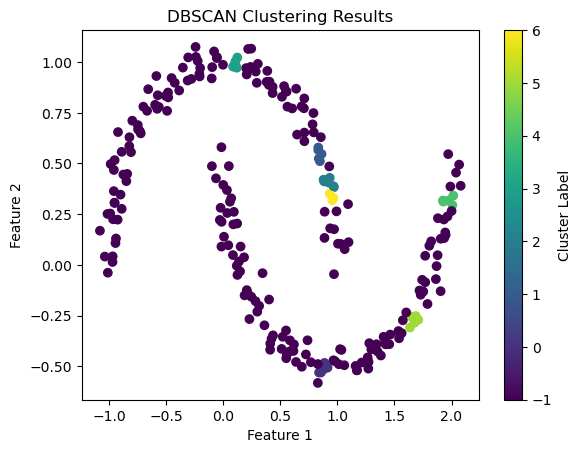

In [11]:
plt.scatter(X[:,0] , X[:,1] , c=labels, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('DBSCAN Clustering Results')
plt.colorbar(label='Cluster Label')
plt.show()
